In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import Isomap

## import data

In [2]:

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 10)
Air=pd.read_csv('...\\AIR.csv')
Control=pd.read_csv('...\\Control.csv')
Copd=pd.read_csv('...\\COPD.csv')
Smokers=pd.read_csv('...\\SMOKERS.csv')

In [3]:
Control.head()

,S1_C0101,S2_C0101,S3_C0101,S4_C0101,S5_C0101,...,S4_C1002,S5_C1002,S6_C1002,S7_C1002,S8_C1002
0,0.224,0.259,0.354,0.516,0.559,...,0.771,0.777,0.085,0.284,0.526
1,0.224,0.259,0.354,0.516,0.559,...,0.771,0.777,0.085,0.284,0.526
2,0.224,0.259,0.354,0.516,0.559,...,0.771,0.778,0.086,0.284,0.526
3,0.224,0.259,0.354,0.516,0.559,...,0.772,0.778,0.085,0.284,0.526
4,0.224,0.259,0.354,0.516,0.559,...,0.772,0.778,0.085,0.284,0.527


In [4]:
Air.head()

,S1_A01,S2_A01,S3_A01,S4_A01,S5_A01,...,S4_A10,S5_A10,S6_A10,S7_A10,S8_A10
0,0.554,1.800,0.321,1.635,1.626,...,1.832,2.143,0.320,0.655,2.076
1,0.554,1.798,0.320,1.633,1.624,...,1.828,2.137,0.319,0.654,2.071
2,0.554,1.799,0.320,1.634,1.624,...,1.826,2.135,0.318,0.653,2.066
3,0.555,1.802,0.321,1.636,1.626,...,1.831,2.140,0.319,0.654,2.070
4,0.555,1.802,0.321,1.637,1.627,...,1.836,2.146,0.320,0.656,2.076


In [5]:
newdf=pd.concat([Control[['S1_C0101','S1_C0102']],Air[['S1_A01','S1_A02']]],axis=1)

In [6]:
newdf['index']=newdf.index

In [7]:
CvsA=newdf.melt(id_vars='index',value_vars=['S1_C0101','S1_C0102','S1_A01','S1_A02'],value_name="Volt")

In [8]:
CvsA

,index,variable,Volt
0,0,S1_C0101,0.224
1,1,S1_C0101,0.224
2,2,S1_C0101,0.224
3,3,S1_C0101,0.224
4,4,S1_C0101,0.224
...,...,...,...
15995,3995,S1_A02,0.557
15996,3996,S1_A02,0.557
15997,3997,S1_A02,0.557
15998,3998,S1_A02,0.557


Text(0.5, 1.0, 'Characteristic for Sensor 1. Air (red,green) and Control (blue, orange) 01')

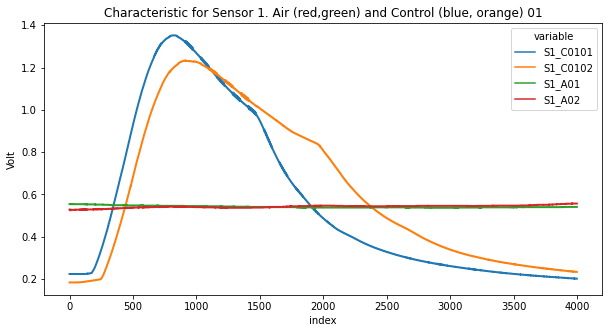

In [9]:
plt.figure(figsize=(10,5))
sns.lineplot(
    data=CvsA,
    x="index", y="Volt", hue="variable",
    estimator=None, lw=2)
plt.title("Characteristic for Sensor 1. Air (red,green) and Control (blue, orange) 01")

# inspection of sensors on controls

In [10]:
Control['index']=Control.index
C_new=Control.melt(id_vars='index',value_vars=Control.columns,value_name="Volt")


In [11]:
C_new['Sensor']=C_new.variable.str[0:2]
C_new['# of Control']=C_new.variable.str[4:6]
C_new['Replicas']=C_new.variable.str[6:8]
C_new

,index,variable,Volt,Sensor,# of Control,Replicas
0,0,S1_C0101,0.224,S1,01,01
1,1,S1_C0101,0.224,S1,01,01
2,2,S1_C0101,0.224,S1,01,01
3,3,S1_C0101,0.224,S1,01,01
4,4,S1_C0101,0.224,S1,01,01
...,...,...,...,...,...,...
639995,3995,S8_C1002,0.752,S8,10,02
639996,3996,S8_C1002,0.752,S8,10,02
639997,3997,S8_C1002,0.752,S8,10,02
639998,3998,S8_C1002,0.752,S8,10,02


In [12]:

C_new_aver_over_replicas=C_new.groupby(['Sensor','index','# of Control'], as_index=False).mean()
C_new_aver_over_replicas_controls=C_new.groupby(['Sensor','index'], as_index=False).mean()

#plt.figure(figsize=(15,8))
#sns.lineplot(
#    data=C_new,
#    x="index", y="Volt", hue="Sensor",
#    estimator=None, lw=1)

Text(0.5, 1.0, 'all runs for controls for each sensor')

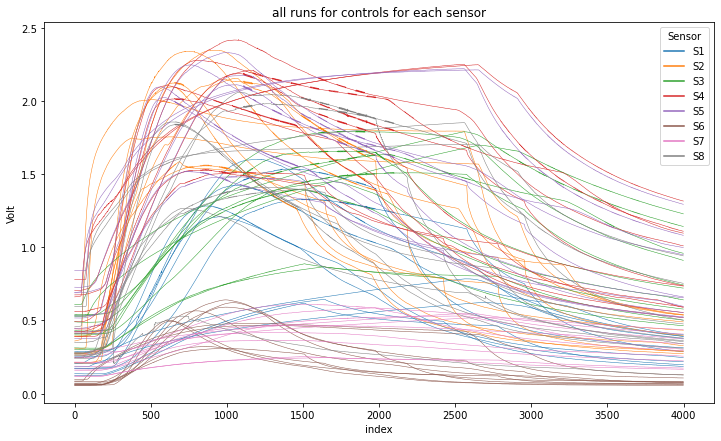

In [13]:
plt.figure(figsize=(12,7))
sns.lineplot(
    data=C_new_aver_over_replicas,
    x="index", y="Volt", hue="Sensor",units="# of Control",
    estimator=None, lw=0.5)
plt.title ("all runs for controls for each sensor")

Text(0.5, 1.0, 'characteristic of controls for each sensor (signal is averaged over all healthy individuals)')

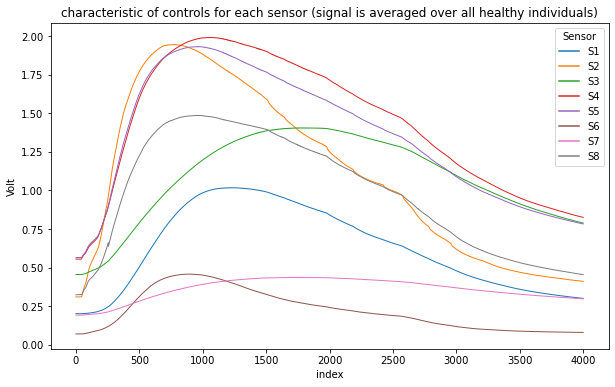

In [14]:
plt.figure(figsize=(10,6))
control_figure=sns.lineplot(
    data=C_new_aver_over_replicas_controls,
    x="index", y="Volt", hue="Sensor",
    estimator=None, lw=1).set(title='Characteristic of Controls')
plt.title("characteristic of controls for each sensor (signal is averaged over all healthy individuals)")

In [15]:
C_new_aver_over_replicas_controls

,Sensor,index,Volt
0,S1,0,0.20180
1,S1,1,0.20170
2,S1,2,0.20160
3,S1,3,0.20170
4,S1,4,0.20170
...,...,...,...
31995,S8,3995,0.45525
31996,S8,3996,0.45510
31997,S8,3997,0.45500
31998,S8,3998,0.45480


## Characteristic of COPD

In [16]:
Copd['index']=Copd.index
Copd_new=Copd.melt(id_vars='index',value_vars=Copd.columns,value_name="Volt")
Copd_new

,index,variable,Volt
0,0,S1_D0101,0.477
1,1,S1_D0101,0.477
2,2,S1_D0101,0.477
3,3,S1_D0101,0.477
4,4,S1_D0101,0.477
...,...,...,...
1279995,3995,S8_D2002,0.239
1279996,3996,S8_D2002,0.239
1279997,3997,S8_D2002,0.239
1279998,3998,S8_D2002,0.239


In [17]:
Copd_new['Sensor']=Copd_new.variable.str[0:2]
Copd_new['# of Patient']=Copd_new.variable.str[4:6]
Copd_new['Replicas']=Copd_new.variable.str[6:8]
Copd_new

,index,variable,Volt,Sensor,# of Patient,Replicas
0,0,S1_D0101,0.477,S1,01,01
1,1,S1_D0101,0.477,S1,01,01
2,2,S1_D0101,0.477,S1,01,01
3,3,S1_D0101,0.477,S1,01,01
4,4,S1_D0101,0.477,S1,01,01
...,...,...,...,...,...,...
1279995,3995,S8_D2002,0.239,S8,20,02
1279996,3996,S8_D2002,0.239,S8,20,02
1279997,3997,S8_D2002,0.239,S8,20,02
1279998,3998,S8_D2002,0.239,S8,20,02


In [18]:
Copd_new_aver_over_replicas=Copd_new.groupby(['Sensor','index','# of Patient'], as_index=False).mean()
Copd_new_aver_over_replicas_patients=Copd_new.groupby(['Sensor','index'], as_index=False).mean()

Text(0.5, 1.0, 'all runs for patients for each sensor')

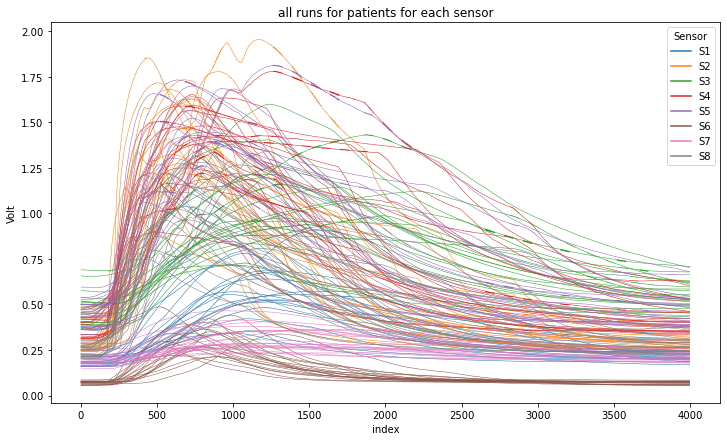

In [19]:
plt.figure(figsize=(12,7))
sns.lineplot(
    data=Copd_new_aver_over_replicas,
    x="index", y="Volt", hue="Sensor",units="# of Patient",
    estimator=None, lw=0.5)
plt.title ("all runs for patients for each sensor")

Text(0.5, 1.0, 'characteristic of patients for each sensor (signal is averaged over all patients)')

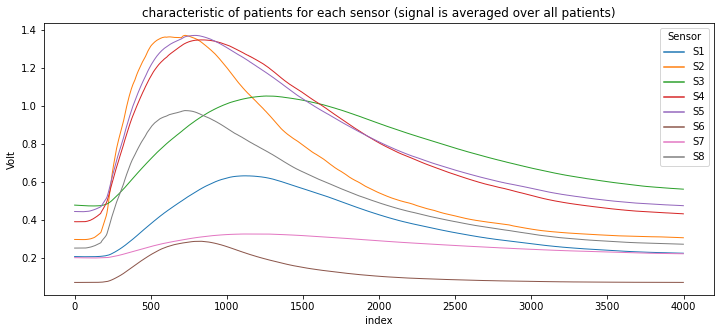

In [20]:
plt.figure(figsize=(12,5))
copd_figure=sns.lineplot(
    data=Copd_new_aver_over_replicas_patients,
    x="index", y="Volt", hue="Sensor",
    estimator=None, lw=1).set(title='Characteristic of Copd')
plt.title("characteristic of patients for each sensor (signal is averaged over all patients)")

## Comparison between groups

(0.0, 2.5)

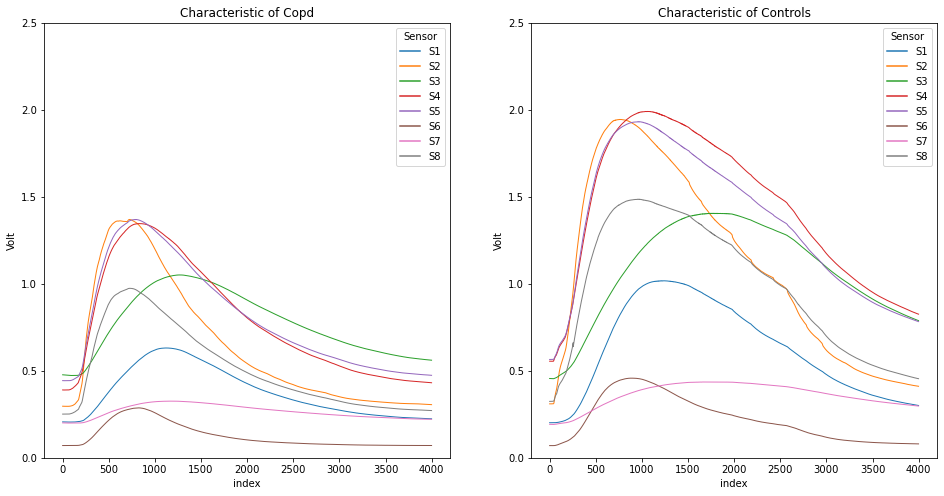

In [21]:
fig, axes = plt.subplots(1, 2,figsize=(16,8))
sns.lineplot(ax=axes[0],
    data=Copd_new_aver_over_replicas_patients,
    x="index", y="Volt", hue="Sensor",
    estimator=None, lw=1).set(title='Characteristic of Copd')
sns.lineplot( ax=axes[1],
    data=C_new_aver_over_replicas_controls,
    x="index", y="Volt", hue="Sensor",
    estimator=None, lw=1).set(title='Characteristic of Controls')
axes[0].set_ylim(0,2.5)
axes[1].set_ylim(0,2.5)




(0.0, 2.5)

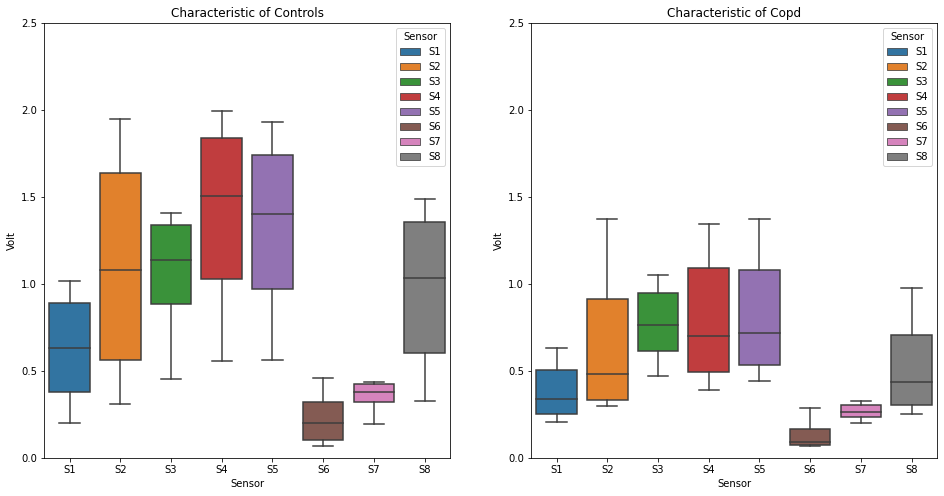

In [22]:
fig, axes = plt.subplots(1, 2,figsize=(16,8))
sns.boxplot(ax=axes[1],data=Copd_new_aver_over_replicas_patients, x="Sensor", y="Volt", hue="Sensor", dodge=False).set(title='Characteristic of Copd')
sns.boxplot(ax=axes[0],data=C_new_aver_over_replicas_controls, x="Sensor", y="Volt", hue="Sensor", dodge=False).set(title='Characteristic of Controls')
axes[0].set_ylim(0,2.5)
axes[1].set_ylim(0,2.5)

## Construction of the mixed dataframe Copd and Controls (20 Copd, 10 Control, 2 measurements for each individual)

In [23]:
Control=Control.drop(["index"],axis=1)
Copd=Copd.drop(["index"],axis=1)


In [24]:
Copd_and_Control=pd.concat([Control,Copd],axis=1)
Copd_and_Control['index']=Copd_and_Control.index

In [25]:
Copd_and_Control_new=Copd_and_Control.melt(id_vars='index',value_vars=Copd_and_Control.columns,value_name="Volt")



In [26]:
Copd_and_Control_new
Copd_and_Control_new['#']=Copd_and_Control_new.variable.str[3:6]
Copd_and_Control_new['Sensor']=Copd_and_Control_new.variable.str[0:2]
Copd_and_Control_new['Replicas']=Copd_and_Control_new.variable.str[6:8]
Copd_and_Control_new['Group']=Copd_and_Control_new.variable.str[3:4]
Copd_and_Control_new

,index,variable,Volt,#,Sensor,Replicas,Group
0,0,S1_C0101,0.224,C01,S1,01,C
1,1,S1_C0101,0.224,C01,S1,01,C
2,2,S1_C0101,0.224,C01,S1,01,C
3,3,S1_C0101,0.224,C01,S1,01,C
4,4,S1_C0101,0.224,C01,S1,01,C
...,...,...,...,...,...,...,...
1919995,3995,S8_D2002,0.239,D20,S8,02,D
1919996,3996,S8_D2002,0.239,D20,S8,02,D
1919997,3997,S8_D2002,0.239,D20,S8,02,D
1919998,3998,S8_D2002,0.239,D20,S8,02,D


In [27]:
Copd_and_Control_new_aver_over_replicas=Copd_and_Control_new.groupby(['index','#','Group','Sensor'], as_index=False).mean()


## Final Dataset

In [28]:
Copd_and_Control_new_aver_over_replicas

,index,#,Group,Sensor,Volt
0,0,C01,C,S1,0.2040
1,0,C01,C,S2,0.2640
2,0,C01,C,S3,0.4015
3,0,C01,C,S4,0.4920
4,0,C01,C,S5,0.5170
...,...,...,...,...,...
959995,3999,D20,D,S4,0.3560
959996,3999,D20,D,S5,0.4075
959997,3999,D20,D,S6,0.0765
959998,3999,D20,D,S7,0.1990


## Tests with different measures and slices (e.g. For S1, S2 etc)

In [29]:
Sens1=Copd_and_Control_new_aver_over_replicas[Copd_and_Control_new_aver_over_replicas['Sensor']=="S1"]
Sens2=Copd_and_Control_new_aver_over_replicas[Copd_and_Control_new_aver_over_replicas['Sensor']=="S2"]
Sens3=Copd_and_Control_new_aver_over_replicas[Copd_and_Control_new_aver_over_replicas['Sensor']=="S3"]
Sens4=Copd_and_Control_new_aver_over_replicas[Copd_and_Control_new_aver_over_replicas['Sensor']=="S4"]
Sens5=Copd_and_Control_new_aver_over_replicas[Copd_and_Control_new_aver_over_replicas['Sensor']=="S5"]
Sens6=Copd_and_Control_new_aver_over_replicas[Copd_and_Control_new_aver_over_replicas['Sensor']=="S6"]
Sens7=Copd_and_Control_new_aver_over_replicas[Copd_and_Control_new_aver_over_replicas['Sensor']=="S7"]
Sens8=Copd_and_Control_new_aver_over_replicas[Copd_and_Control_new_aver_over_replicas['Sensor']=="S8"]

In [30]:
Sens1

,index,#,Group,Sensor,Volt
0,0,C01,C,S1,0.2040
8,0,C02,C,S1,0.1725
16,0,C03,C,S1,0.2760
24,0,C04,C,S1,0.2515
32,0,C05,C,S1,0.2890
...,...,...,...,...,...
959960,3999,D16,D,S1,0.2245
959968,3999,D17,D,S1,0.1850
959976,3999,D18,D,S1,0.2100
959984,3999,D19,D,S1,0.1960


[Text(0.5, 1.0, 'Control (C) vs Patients (D) for Sensor 1')]

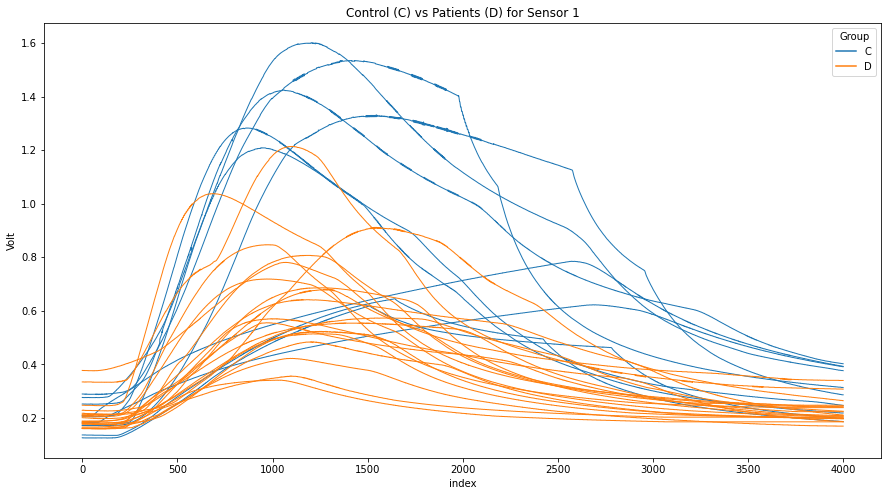

In [31]:
plt.figure(figsize=(15,8))
sns.lineplot(
    data=Sens1,
    x="index", y="Volt", hue="Group",units="#",
    estimator=None, lw=1).set(title='Control (C) vs Patients (D) for Sensor 1')


## Comparison among Sensors in Controls vs Patients

[Text(0.5, 1.0, 'Control (C) vs Patients (D) for Sensor 8')]

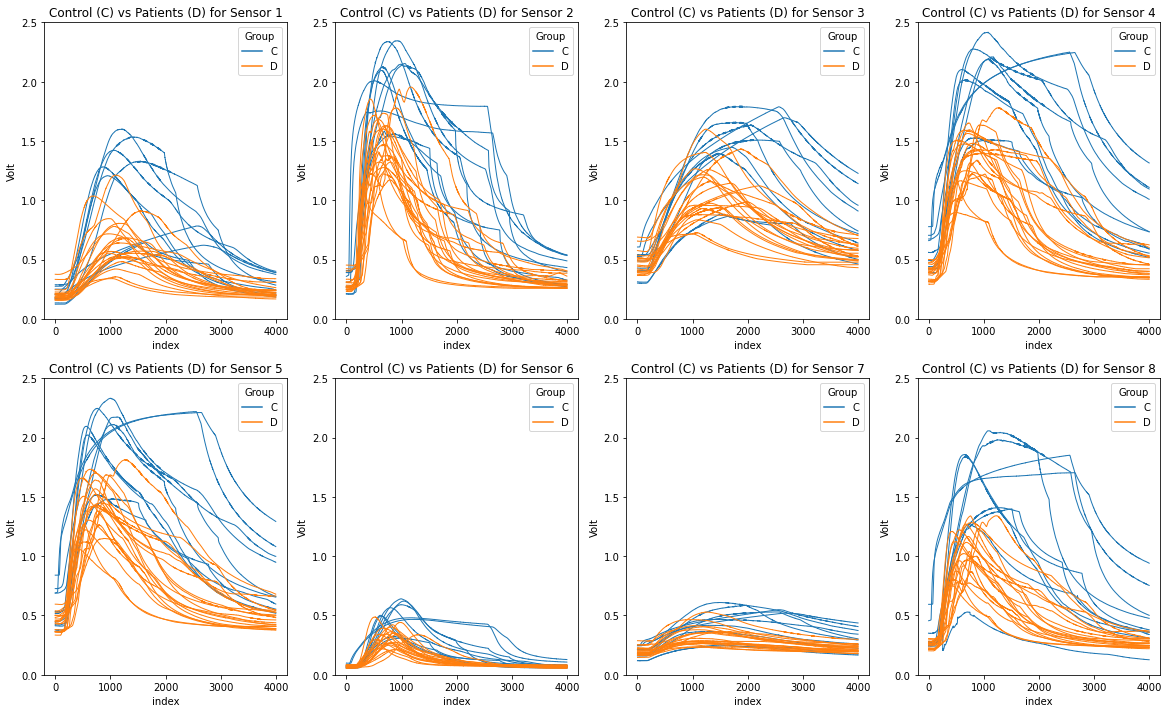

In [32]:
fig, axes = plt.subplots(2, 4,figsize=(20,12))

axes[0,0].set_ylim(0,2.5)
axes[0,1].set_ylim(0,2.5)
axes[0,2].set_ylim(0,2.5)
axes[0,3].set_ylim(0,2.5)
axes[1,0].set_ylim(0,2.5)
axes[1,1].set_ylim(0,2.5)
axes[1,2].set_ylim(0,2.5)
axes[1,3].set_ylim(0,2.5)


sns.lineplot(ax=axes[0,0],
    data=Sens1,
    x="index", y="Volt", hue="Group",units="#",
    estimator=None, lw=1).set(title='Control (C) vs Patients (D) for Sensor 1')


sns.lineplot(ax=axes[0,1],
    data=Sens2,
    x="index", y="Volt", hue="Group",units="#",
    estimator=None, lw=1).set(title='Control (C) vs Patients (D) for Sensor 2')


sns.lineplot(ax=axes[0,2],
    data=Sens3,
    x="index", y="Volt", hue="Group",units="#",
    estimator=None, lw=1).set(title='Control (C) vs Patients (D) for Sensor 3')


sns.lineplot(ax=axes[0,3],
    data=Sens4,
    x="index", y="Volt", hue="Group",units="#",
    estimator=None, lw=1).set(title='Control (C) vs Patients (D) for Sensor 4')


sns.lineplot(ax=axes[1,0],
    data=Sens5,
    x="index", y="Volt", hue="Group",units="#",
    estimator=None, lw=1).set(title='Control (C) vs Patients (D) for Sensor 5')


sns.lineplot(ax=axes[1,1],
    data=Sens6,
    x="index", y="Volt", hue="Group",units="#",
    estimator=None, lw=1).set(title='Control (C) vs Patients (D) for Sensor 6')


sns.lineplot(ax=axes[1,2],
    data=Sens7,
    x="index", y="Volt", hue="Group",units="#",
    estimator=None, lw=1).set(title='Control (C) vs Patients (D) for Sensor 7')


sns.lineplot(ax=axes[1,3],
    data=Sens8,
    x="index", y="Volt", hue="Group",units="#",
    estimator=None, lw=1).set(title='Control (C) vs Patients (D) for Sensor 8')






## Distributions 

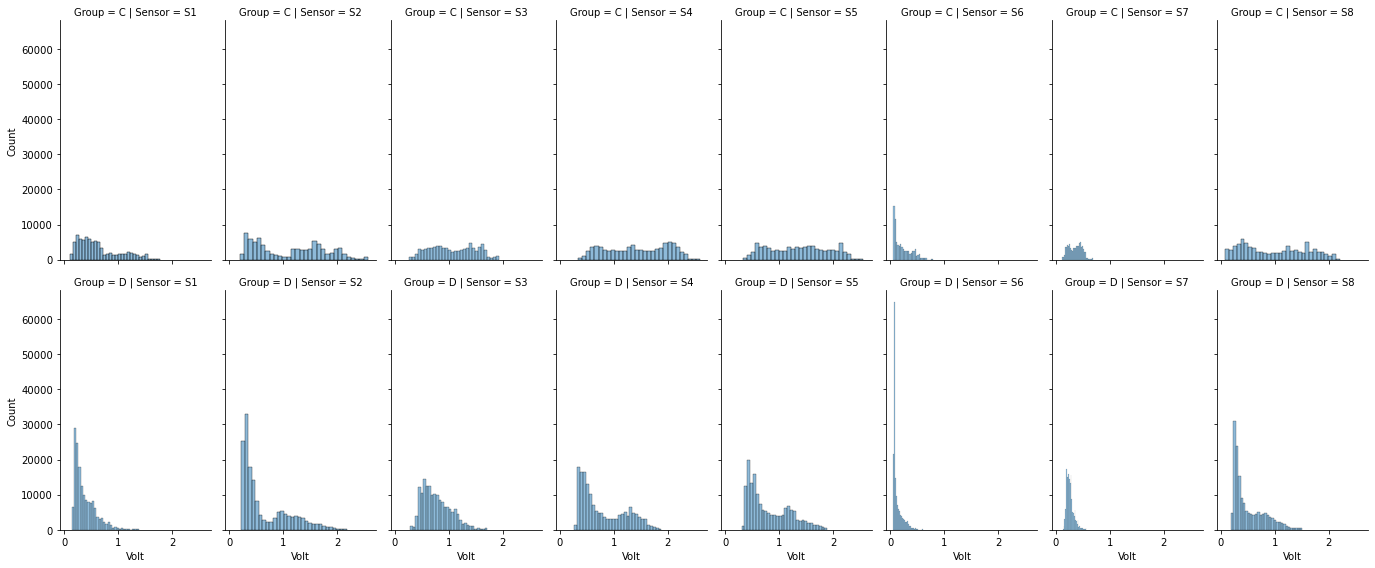

In [33]:

g = sns.FacetGrid(Copd_and_Control_new, col="Sensor",  row="Group",height=4,aspect=0.6)
g.map_dataframe(sns.histplot, x="Volt",hue="Group",bins=30)


[Text(0.5, 1.0, 'Control (C) vs Patients (D) for all Sensors')]

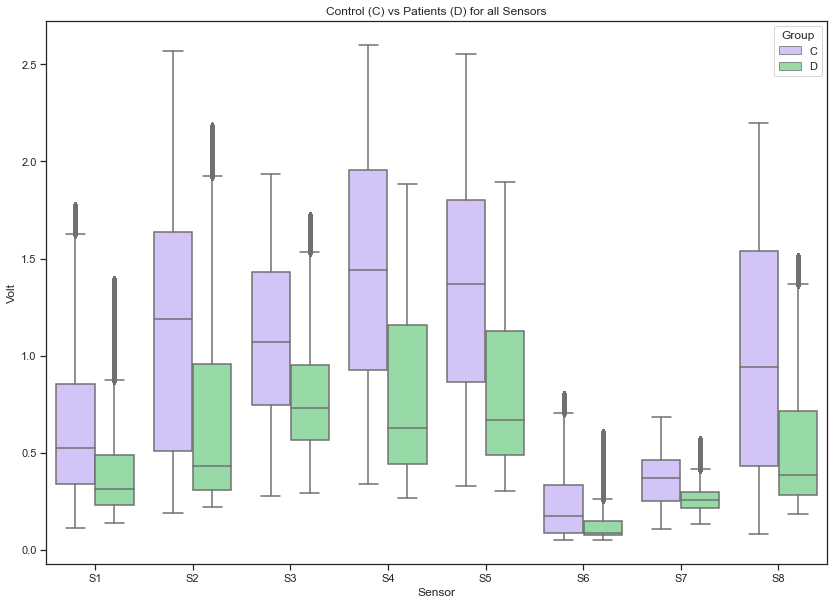

In [34]:
plt.figure(figsize=(14,10))

sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Sensor", y="Volt",
            hue="Group", palette=["m", "g"],
            data=Copd_and_Control_new).set(title='Control (C) vs Patients (D) for all Sensors')
#sns.despine(offset=10, trim=True)









In [35]:
Sens1

,index,#,Group,Sensor,Volt
0,0,C01,C,S1,0.2040
8,0,C02,C,S1,0.1725
16,0,C03,C,S1,0.2760
24,0,C04,C,S1,0.2515
32,0,C05,C,S1,0.2890
...,...,...,...,...,...
959960,3999,D16,D,S1,0.2245
959968,3999,D17,D,S1,0.1850
959976,3999,D18,D,S1,0.2100
959984,3999,D19,D,S1,0.1960


## extract some features for test

In [36]:
Mean1=Sens1.groupby(['#','Group'], as_index=False).mean()

maxim1=Sens1.groupby(['#','Group'], as_index=False).max()["Volt"]
var1=Sens1.groupby(['#','Group'], as_index=False).var()["Volt"]
skew1=Sens1.groupby(['#','Group'], as_index=False).skew(axis = 0,skipna=True)["Volt"]
median1=Sens1.groupby(['#','Group'], as_index=False).median()["Volt"]
kurtosis1=Sens1.groupby(['#','Group'], as_index=False).apply(pd.DataFrame.kurt)["Volt"]

####################################################################################################

Mean2=Sens2.groupby(['#','Group'], as_index=False).mean()

maxim2=Sens2.groupby(['#','Group'], as_index=False).max()["Volt"]
var2=Sens2.groupby(['#','Group'], as_index=False).var()["Volt"]
skew2=Sens2.groupby(['#','Group'], as_index=False).skew(axis = 0,skipna=True)["Volt"]
median2=Sens2.groupby(['#','Group'], as_index=False).median()["Volt"]
kurtosis2=Sens2.groupby(['#','Group'], as_index=False).apply(pd.DataFrame.kurt)["Volt"]

######################################################################################################

Mean3=Sens3.groupby(['#','Group'], as_index=False).mean()

maxim3=Sens3.groupby(['#','Group'], as_index=False).max()["Volt"]
var3=Sens3.groupby(['#','Group'], as_index=False).var()["Volt"]
skew3=Sens3.groupby(['#','Group'], as_index=False).skew(axis = 0,skipna=True)["Volt"]
median3=Sens3.groupby(['#','Group'], as_index=False).median()["Volt"]
kurtosis3=Sens3.groupby(['#','Group'], as_index=False).apply(pd.DataFrame.kurt)["Volt"]

######################################################################################################

Mean4=Sens4.groupby(['#','Group'], as_index=False).mean()

maxim4=Sens4.groupby(['#','Group'], as_index=False).max()["Volt"]
var4=Sens4.groupby(['#','Group'], as_index=False).var()["Volt"]
skew4=Sens4.groupby(['#','Group'], as_index=False).skew(axis = 0,skipna=True)["Volt"]
median4=Sens4.groupby(['#','Group'], as_index=False).median()["Volt"]
kurtosis4=Sens4.groupby(['#','Group'], as_index=False).apply(pd.DataFrame.kurt)["Volt"]

########################################################################################################

Mean5=Sens5.groupby(['#','Group'], as_index=False).mean()

maxim5=Sens5.groupby(['#','Group'], as_index=False).max()["Volt"]
var5=Sens5.groupby(['#','Group'], as_index=False).var()["Volt"]
skew5=Sens5.groupby(['#','Group'], as_index=False).skew(axis = 0,skipna=True)["Volt"]
median5=Sens5.groupby(['#','Group'], as_index=False).median()["Volt"]
kurtosis5=Sens5.groupby(['#','Group'], as_index=False).apply(pd.DataFrame.kurt)["Volt"]

#########################################################################################################

Mean6=Sens6.groupby(['#','Group'], as_index=False).mean()

maxim6=Sens6.groupby(['#','Group'], as_index=False).max()["Volt"]
var6=Sens6.groupby(['#','Group'], as_index=False).var()["Volt"]
skew6=Sens6.groupby(['#','Group'], as_index=False).skew(axis = 0,skipna=True)["Volt"]
median6=Sens6.groupby(['#','Group'], as_index=False).median()["Volt"]
kurtosis6=Sens6.groupby(['#','Group'], as_index=False).apply(pd.DataFrame.kurt)["Volt"]

##########################################################################################################

Mean7=Sens7.groupby(['#','Group'], as_index=False).mean()

maxim7=Sens7.groupby(['#','Group'], as_index=False).max()["Volt"]
var7=Sens7.groupby(['#','Group'], as_index=False).var()["Volt"]
skew7=Sens7.groupby(['#','Group'], as_index=False).skew(axis = 0,skipna=True)["Volt"]
median7=Sens7.groupby(['#','Group'], as_index=False).median()["Volt"]
kurtosis7=Sens7.groupby(['#','Group'], as_index=False).apply(pd.DataFrame.kurt)["Volt"]

###########################################################################################################

Mean8=Sens8.groupby(['#','Group'], as_index=False).mean()

maxim8=Sens8.groupby(['#','Group'], as_index=False).max()["Volt"]
var8=Sens8.groupby(['#','Group'], as_index=False).var()["Volt"]
skew8=Sens8.groupby(['#','Group'], as_index=False).skew(axis = 0,skipna=True)["Volt"]
median8=Sens8.groupby(['#','Group'], as_index=False).median()["Volt"]
kurtosis8=Sens8.groupby(['#','Group'], as_index=False).apply(pd.DataFrame.kurt)["Volt"]

###########################################################################################################






C:\Users\yiann\AppData\Local\Temp\ipykernel_19240\178303924.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew1=Sens1.groupby(['#','Group'], as_index=False).skew(axis = 0,skipna=True)["Volt"]
C:\Users\yiann\AppData\Local\Temp\ipykernel_19240\178303924.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurtosis1=Sens1.groupby(['#','Group'], as_index=False).apply(pd.DataFrame.kurt)["Volt"]
C:\Users\yiann\AppData\Local\Temp\ipykernel_19240\178303924.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before call

In [37]:
FeatS1=Mean1[["#","Group","Volt"]]
FeatS1.columns=["#","Group","S1_Mean"]
FeatS1["S1_max"]=maxim1
FeatS1["S1_var"]=var1
FeatS1["S1_med"]=median1
FeatS1["S1_Kurt"]=kurtosis1
FeatS1["S1_Skew"]=skew1

##################################################################################################################

FeatS2=Mean2[["#","Group","Volt"]]
FeatS2.columns=["#","Group","S2_Mean"]
FeatS2["S2_max"]=maxim2
FeatS2["S2_var"]=var2
FeatS2["S2_med"]=median2
FeatS2["S2_Kurt"]=kurtosis2
FeatS2["S2_Skew"]=skew2

###################################################################################################################

FeatS3=Mean3[["#","Group","Volt"]]
FeatS3.columns=["#","Group","S3_Mean"]
FeatS3["S3_max"]=maxim3
FeatS3["S3_var"]=var3
FeatS3["S3_med"]=median3
FeatS3["S3_Kurt"]=kurtosis3
FeatS3["S3_Skew"]=skew3

####################################################################################################################

FeatS4=Mean4[["#","Group","Volt"]]
FeatS4.columns=["#","Group","S4_Mean"]
FeatS4["S4_max"]=maxim4
FeatS4["S4_var"]=var4
FeatS4["S4_med"]=median4
FeatS4["S4_Kurt"]=kurtosis4
FeatS4["S4_Skew"]=skew4

####################################################################################################################

FeatS5=Mean5[["#","Group","Volt"]]
FeatS5.columns=["#","Group","S5_Mean"]
FeatS5["S5_max"]=maxim5
FeatS5["S5_var"]=var5
FeatS5["S5_med"]=median5
FeatS5["S5_Kurt"]=kurtosis5
FeatS5["S5_Skew"]=skew5

#####################################################################################################################

FeatS6=Mean6[["#","Group","Volt"]]
FeatS6.columns=["#","Group","S6_Mean"]
FeatS6["S6_max"]=maxim6
FeatS6["S6_var"]=var6
FeatS6["S6_med"]=median6
FeatS6["S6_Kurt"]=kurtosis6
FeatS6["S6_Skew"]=skew6

######################################################################################################################

FeatS7=Mean7[["#","Group","Volt"]]
FeatS7.columns=["#","Group","S7_Mean"]
FeatS7["S7_max"]=maxim7
FeatS7["S7_var"]=var7
FeatS7["S7_med"]=median7
FeatS7["S7_Kurt"]=kurtosis7
FeatS7["S7_Skew"]=skew7

#######################################################################################################################

FeatS8=Mean8[["#","Group","Volt"]]
FeatS8.columns=["#","Group","S8_Mean"]
FeatS8["S8_max"]=maxim8
FeatS8["S8_var"]=var8
FeatS8["S8_med"]=median8
FeatS8["S8_Kurt"]=kurtosis8
FeatS8["S8_Skew"]=skew8

In [38]:
All_Features=pd.concat([FeatS1, FeatS2.iloc[:,[2,3,4,5,6,7]],FeatS3.iloc[:,[2,3,4,5,6,7]],FeatS4.iloc[:,[2,3,4,5,6,7]],FeatS5.iloc[:,[2,3,4,5,6,7]],FeatS6.iloc[:,[2,3,4,5,6,7]],FeatS7.iloc[:,[2,3,4,5,6,7]],FeatS8.iloc[:,[2,3,4,5,6,7]]], axis=1)


In [39]:
All_Features

,#,Group,S1_Mean,S1_max,S1_var,...,S8_max,S8_var,S8_med,S8_Kurt,S8_Skew
0,C01,C,0.599975,1.2825,0.132814,...,1.8575,0.271557,0.65950,-1.121665,0.582379
1,C02,C,0.596884,1.2085,0.118351,...,1.8420,0.258627,0.67975,-1.181699,0.528219
2,C03,C,0.881645,1.6010,0.178665,...,1.2665,0.083110,0.71900,-1.027847,0.282576
3,C04,C,0.821865,1.4240,0.125074,...,0.5300,0.012789,0.25400,-0.631798,0.662617
4,C05,C,0.814963,1.5345,0.223420,...,1.9815,0.360733,0.99200,-1.636951,0.198220
...,...,...,...,...,...,...,...,...,...,...,...
25,D16,D,0.384798,0.5730,0.017195,...,1.1170,0.066854,0.58250,-1.180263,0.353923
26,D17,D,0.364387,0.5700,0.016711,...,1.3400,0.093235,0.58450,-0.541253,0.649179
27,D18,D,0.433491,0.6420,0.024493,...,1.2820,0.101341,0.77725,-1.254313,0.018806
28,D19,D,0.298788,0.4840,0.010376,...,0.9620,0.050325,0.33100,-0.388788,0.949366


In [40]:
All_Features.shape

(30, 50)

## Correlation Matrix of features

In [41]:
corrma=All_Features.iloc[:,2:49].corr()
corrma.abs() ##i take the absolute values here



,S1_Mean,S1_max,S1_var,S1_med,S1_Kurt,...,S8_Mean,S8_max,S8_var,S8_med,S8_Kurt
S1_Mean,1.000000,0.956620,0.911039,0.943944,0.244126,...,0.475204,0.488746,0.579663,0.427471,0.516900
S1_max,0.956620,1.000000,0.947733,0.822896,0.228226,...,0.345072,0.471775,0.600216,0.254071,0.488067
S1_var,0.911039,0.947733,1.000000,0.784265,0.348645,...,0.382243,0.536012,0.725186,0.280744,0.463777
S1_med,0.943944,0.822896,0.784265,1.000000,0.270384,...,0.548725,0.458547,0.492489,0.559676,0.509367
S1_Kurt,0.244126,0.228226,0.348645,0.270384,1.000000,...,0.064307,0.189925,0.395262,0.057287,0.658376
...,...,...,...,...,...,...,...,...,...,...,...
S8_Mean,0.475204,0.345072,0.382243,0.548725,0.064307,...,1.000000,0.893661,0.706479,0.977731,0.477942
S8_max,0.488746,0.471775,0.536012,0.458547,0.189925,...,0.893661,1.000000,0.893187,0.794608,0.509853
S8_var,0.579663,0.600216,0.725186,0.492489,0.395262,...,0.706479,0.893187,1.000000,0.589830,0.569027
S8_med,0.427471,0.254071,0.280744,0.559676,0.057287,...,0.977731,0.794608,0.589830,1.000000,0.446930


Text(0.5, 1.0, 'Correlation among Sensors')

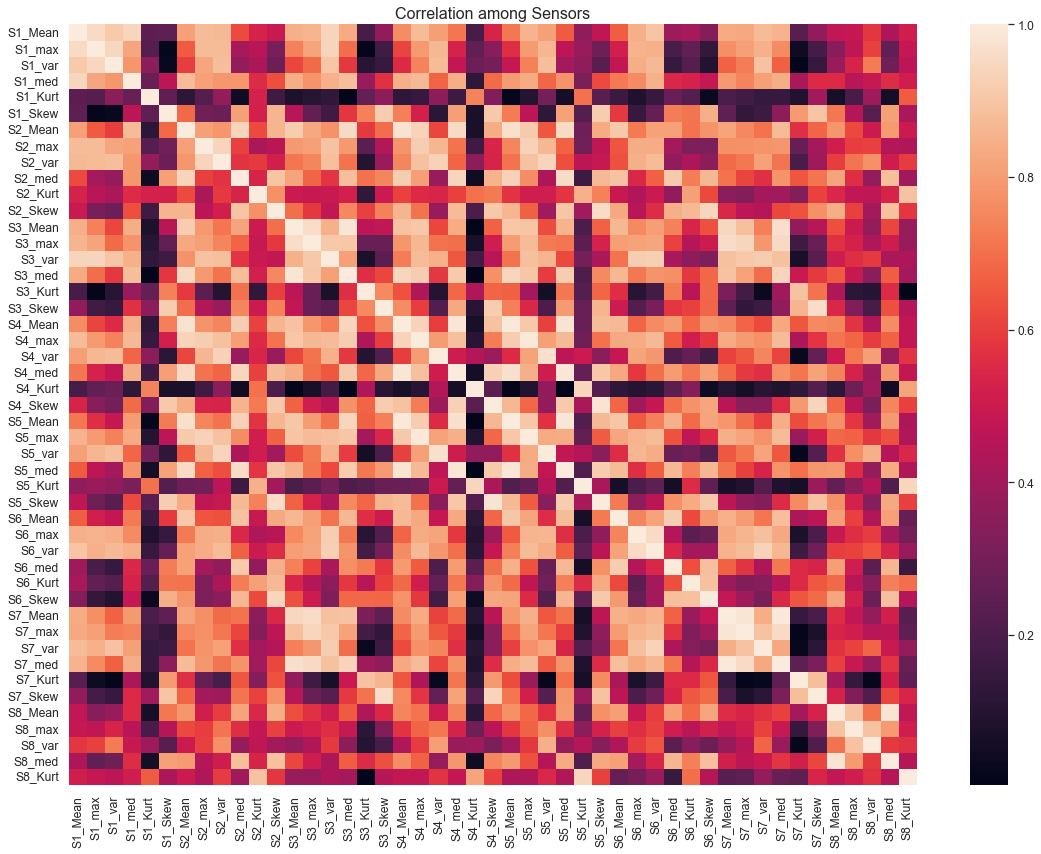

In [84]:
plt.figure(figsize=(19,14))
sns.heatmap(corrma.abs(), annot=False).set_title ("Correlation among Sensors", fontsize=16)

## Principal component analysis

In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x = All_Features.iloc[:,2:50 ]
x = StandardScaler().fit_transform(x)
x.shape

(30, 48)

In [44]:
pca = PCA(n_components=5)
PrinComp = pca.fit_transform(x)

In [45]:
## 5 components explain 95% of variation observed in the dataset
pca.explained_variance_ratio_.sum()

0.9525939767286206

In [46]:
df_pca  = pd.DataFrame(PrinComp, columns=["Pc1","Pc2","Pc3","Pc4","Pc5"])

In [47]:
Pca_dataset=pd.concat([FeatS1.iloc[:,0:2],df_pca],axis=1)
Pca_dataset

,#,Group,Pc1,Pc2,Pc3,Pc4,Pc5
0,C01,C,3.163902,-3.371472,-2.087835,-0.203983,2.142680
1,C02,C,3.545242,-3.077910,-1.825309,-0.262580,1.379038
2,C03,C,9.687055,-3.457151,1.418490,2.460229,-1.076495
3,C04,C,6.892320,0.048567,2.305594,5.915949,0.100463
4,C05,C,7.936054,-5.160649,-1.766776,-1.798697,0.294084
...,...,...,...,...,...,...,...
25,D16,D,-1.020076,2.706696,-2.813487,0.391198,-1.064816
26,D17,D,-2.073165,2.135631,-0.116215,1.206524,2.615784
27,D18,D,1.008852,3.899875,-2.057678,1.224882,0.563786
28,D19,D,-4.524098,0.635178,-1.042905,0.014159,-0.329348


[Text(0.5, 1.0, 'Projection of Control (Blue) vs Patients (Orange) on the first 2 principal components')]

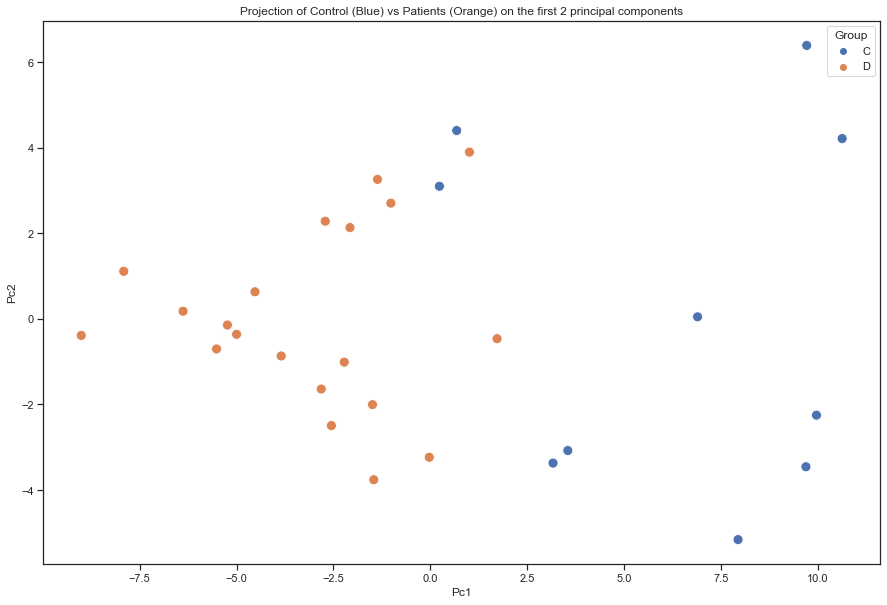

In [48]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="Pc1",
                    y="Pc2",
                    hue="Group",
                    data=Pca_dataset,s=100,alpha=1,marker="o",palette="deep").set(title='Projection of Control (Blue) vs Patients (Orange) on the first 2 principal components')

## Principal Component Analysis Results

[Text(0.5, 1.0, 'Projection of Control (Blue) vs Patients (Orange)on the 2st and 3nd PC')]

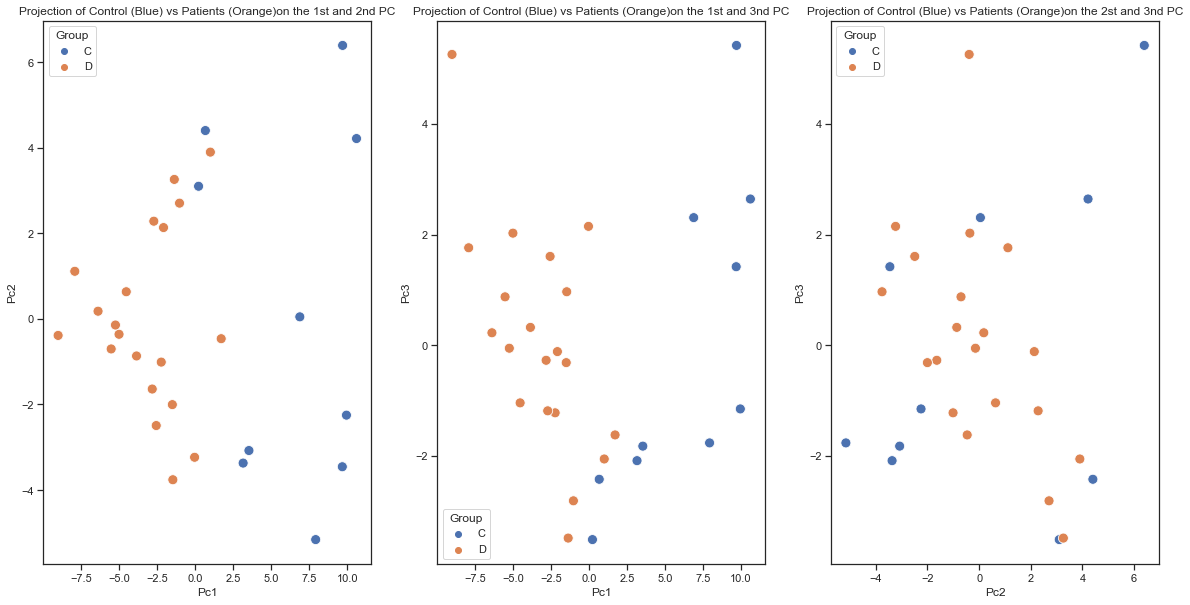

In [49]:
fig, axes = plt.subplots(1, 3,figsize=(20,10))

sns.scatterplot(ax=axes[0],x="Pc1",y="Pc2",hue="Group",
data=Pca_dataset,s=100,alpha=1,marker="o",palette="deep").set(title='Projection of Control (Blue) vs Patients (Orange)on the 1st and 2nd PC')
sns.scatterplot(ax=axes[1],x="Pc1",y="Pc3",hue="Group",
data=Pca_dataset,s=100,alpha=1,marker="o",palette="deep").set(title='Projection of Control (Blue) vs Patients (Orange)on the 1st and 3nd PC')
sns.scatterplot(ax=axes[2],x="Pc2",y="Pc3",hue="Group",
data=Pca_dataset,s=100,alpha=1,marker="o",palette="deep").set(title='Projection of Control (Blue) vs Patients (Orange)on the 2st and 3nd PC')



## Visualization of different scatterplots with principal components

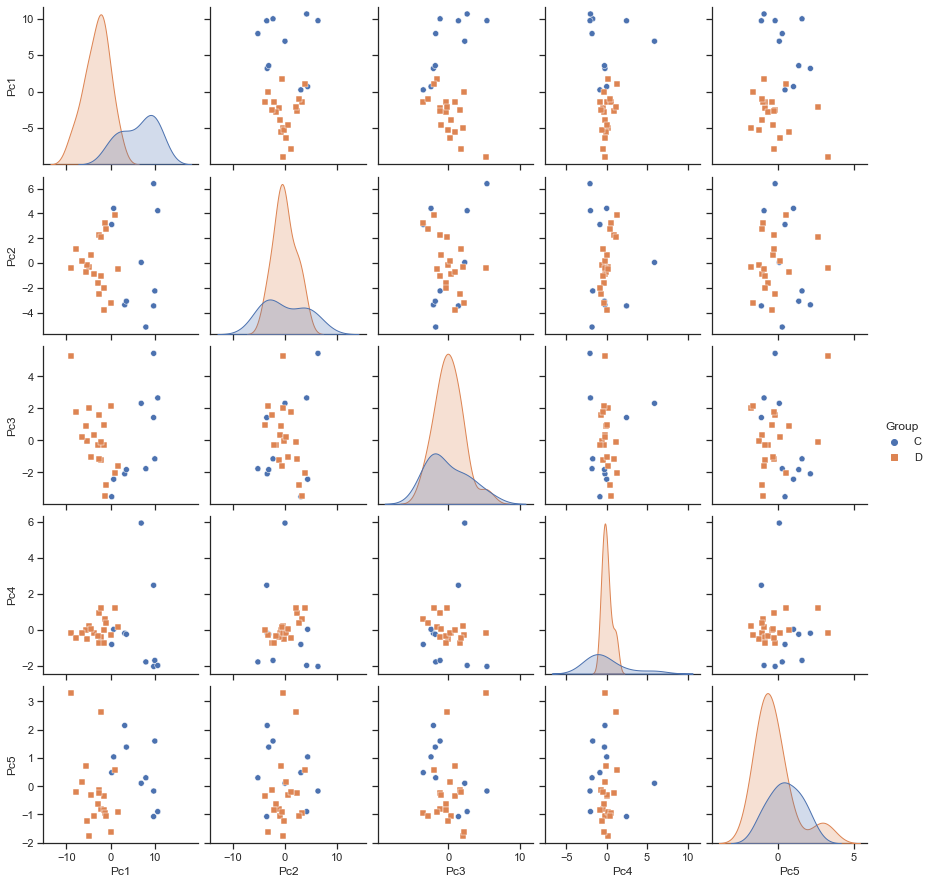

In [50]:
sns.pairplot(Pca_dataset, hue="Group", markers=["o", "s"],palette="deep")

## we can clearly see the separation power of the PCA over the features of all sensors

## A 3d plot

Text(0.5, 0.92, '3d plot on PCA Controls (blue) vs Patients (orange)')

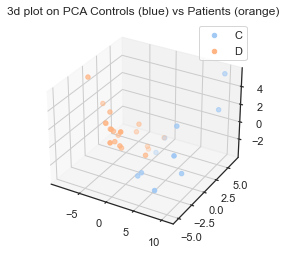

In [51]:
#%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for s in Pca_dataset.Group.unique():
    ax.scatter(Pca_dataset.Pc1[Pca_dataset.Group==s],Pca_dataset.Pc2[Pca_dataset.Group==s],Pca_dataset.Pc3[Pca_dataset.Group==s],label=s)
    
ax.legend()
ax.set_title("3d plot on PCA Controls (blue) vs Patients (orange)")


## Its again clear that separation is achievable

## simple random forest application
### first by using only some principal components and using all 48 features

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
seed=1821
pc_f=5 ##number of principal components as features from 1-5
nof=2+pc_f

In [53]:
clf_pca = RandomForestClassifier(n_estimators = 400,oob_score=True,random_state=seed)
clf_all = RandomForestClassifier(n_estimators = 400,oob_score=True,random_state=seed)  
#Pca_dataset.iloc[:,2:7]
#Pca_dataset.Group

In [54]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(All_Features.iloc[:,2:], All_Features.iloc[:,1], test_size = 0.3,stratify=All_Features.Group,random_state=seed)

X_train, X_test, y_train, y_test = train_test_split(Pca_dataset.iloc[:,2:nof], Pca_dataset.Group, test_size = 0.2,stratify=Pca_dataset.Group,random_state=seed)

In [55]:
clf_pca.fit(X_train, y_train)
clf_all.fit(X_train_all, y_train_all)
  
# performing predictions on the test dataset
y_pred = clf_pca.predict(X_test)

y_pred_all = clf_all.predict(X_test_all)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL Using PCA: ", metrics.accuracy_score(y_test, y_pred))
print("ACCURACY OF THE MODEL using all features: ", metrics.accuracy_score(y_test_all, y_pred_all))


ACCURACY OF THE MODEL Using PCA:  1.0
ACCURACY OF THE MODEL using all features:  0.8888888888888888


## the accuracy is satisfactory

In [56]:
print("Oob Using PCA: ", clf_pca.oob_score_)
print("Oob Using all features: ",clf_all.oob_score_)

Oob Using PCA:  0.7916666666666666
Oob Using all features:  0.9047619047619048


## PCA seems to score more or less the same accuracy in discriminating between Controls and Patients 

## Leave one out assessment


In [57]:
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
#create model
cv = LeaveOneOut()
# evaluate model


clf_pca = RandomForestClassifier(n_estimators = 400,oob_score=True,random_state=seed)
clf_all = RandomForestClassifier(n_estimators = 400,oob_score=True,random_state=seed)  



from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
preds_pca = cross_val_predict(clf_pca,Pca_dataset.iloc[:,2:nof], Pca_dataset.Group, cv=cv,n_jobs=-1)
preds_all = cross_val_predict(clf_all,All_Features.iloc[:,2:], All_Features.Group, cv=cv,n_jobs=-1)

conf_mat_pca = confusion_matrix(Pca_dataset.Group, preds_pca)
conf_mat_all = confusion_matrix(All_Features.Group, preds_all)


Text(0.5, 1.0, 'Confusion Matrix using all features')

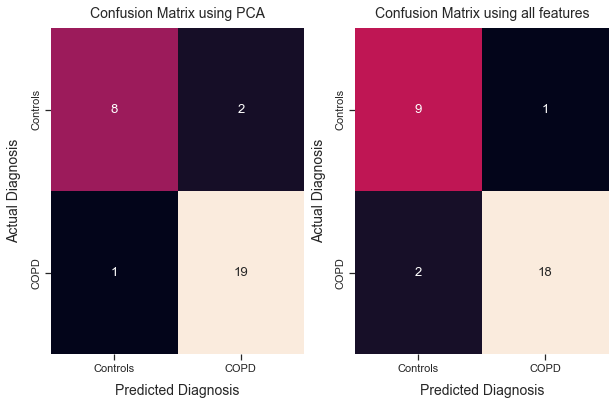

In [58]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 6))

sns.set(font_scale = 1.1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format   
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers. 
sns.heatmap(conf_mat_pca, annot=True,ax=ax1,cbar=False)

# set x-axis label and ticks. 
ax1.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=10)
ax1.xaxis.set_ticklabels(['Controls', 'COPD'])

# set y-axis label and ticks
ax1.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=10)
ax1.yaxis.set_ticklabels(['Controls', 'COPD'])

# set plot title
ax1.set_title("Confusion Matrix using PCA", fontsize=14, pad=10)

sns.set(font_scale = 1.1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format   
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers. 
sns.heatmap(conf_mat_all, annot=True,ax=ax2,cbar=False)

# set x-axis label and ticks. 
ax2.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=10)
ax2.xaxis.set_ticklabels(['Controls', 'COPD'])

# set y-axis label and ticks
ax2.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=10)
ax2.yaxis.set_ticklabels(['Controls', 'COPD'])

# set plot title
ax2.set_title("Confusion Matrix using all features", fontsize=14, pad=10)



## Let's add the SMOKERS in the dataset

In [59]:
### Smokers
Smokers['index']=Smokers.index
Smokers_new=Smokers.melt(id_vars='index',value_vars=Smokers.columns,value_name="Volt")
Smokers_new


,index,variable,Volt
0,0,S1_S0101,0.361
1,1,S1_S0101,0.361
2,2,S1_S0101,0.361
3,3,S1_S0101,0.361
4,4,S1_S0101,0.361
...,...,...,...
255995,3995,S8_S0402,0.547
255996,3996,S8_S0402,0.547
255997,3997,S8_S0402,0.547
255998,3998,S8_S0402,0.547


In [60]:
Smokers_new['Sensor']=Smokers_new.variable.str[0:2]
Smokers_new['#']=Smokers_new.variable.str[3:6]
Smokers_new['Replicas']=Smokers_new.variable.str[6:8]
Smokers_new['Group']=Smokers_new.variable.str[3:4]
Smokers_new

,index,variable,Volt,Sensor,#,Replicas,Group
0,0,S1_S0101,0.361,S1,S01,01,S
1,1,S1_S0101,0.361,S1,S01,01,S
2,2,S1_S0101,0.361,S1,S01,01,S
3,3,S1_S0101,0.361,S1,S01,01,S
4,4,S1_S0101,0.361,S1,S01,01,S
...,...,...,...,...,...,...,...
255995,3995,S8_S0402,0.547,S8,S04,02,S
255996,3996,S8_S0402,0.547,S8,S04,02,S
255997,3997,S8_S0402,0.547,S8,S04,02,S
255998,3998,S8_S0402,0.547,S8,S04,02,S


In [61]:

Smokers_new_aver_over_replicas=Smokers_new.groupby(['Sensor','index','#', 'Group'], as_index=False).mean()
Smokers_new_aver_over_replicas_smokers=Smokers_new.groupby(['Sensor','index'], as_index=False).mean()

In [62]:
Smokers_new_aver_over_replicas

,Sensor,index,#,Group,Volt
0,S1,0,S01,S,0.3630
1,S1,0,S02,S,0.3585
2,S1,0,S03,S,0.3370
3,S1,0,S04,S,0.3580
4,S1,1,S01,S,0.3630
...,...,...,...,...,...
127995,S8,3998,S04,S,0.5025
127996,S8,3999,S01,S,0.4600
127997,S8,3999,S02,S,0.4460
127998,S8,3999,S03,S,0.4570


In [63]:
Sens1=Smokers_new_aver_over_replicas[Smokers_new_aver_over_replicas['Sensor']=="S1"]
Sens2=Smokers_new_aver_over_replicas[Smokers_new_aver_over_replicas['Sensor']=="S2"]
Sens3=Smokers_new_aver_over_replicas[Smokers_new_aver_over_replicas['Sensor']=="S3"]
Sens4=Smokers_new_aver_over_replicas[Smokers_new_aver_over_replicas['Sensor']=="S4"]
Sens5=Smokers_new_aver_over_replicas[Smokers_new_aver_over_replicas['Sensor']=="S5"]
Sens6=Smokers_new_aver_over_replicas[Smokers_new_aver_over_replicas['Sensor']=="S6"]
Sens7=Smokers_new_aver_over_replicas[Smokers_new_aver_over_replicas['Sensor']=="S7"]
Sens8=Smokers_new_aver_over_replicas[Smokers_new_aver_over_replicas['Sensor']=="S8"]

Sens1


,Sensor,index,#,Group,Volt
0,S1,0,S01,S,0.3630
1,S1,0,S02,S,0.3585
2,S1,0,S03,S,0.3370
3,S1,0,S04,S,0.3580
4,S1,1,S01,S,0.3630
...,...,...,...,...,...
15995,S1,3998,S04,S,0.4195
15996,S1,3999,S01,S,0.3855
15997,S1,3999,S02,S,0.3760
15998,S1,3999,S03,S,0.3745


In [64]:
Mean1=Sens1.groupby(['#','Group'], as_index=False).mean()

maxim1=Sens1.groupby(['#','Group'], as_index=False).max()["Volt"]
var1=Sens1.groupby(['#','Group'], as_index=False).var()["Volt"]
skew1=Sens1.groupby(['#','Group'], as_index=False).skew(axis = 0,skipna=True)["Volt"]
median1=Sens1.groupby(['#','Group'], as_index=False).median()["Volt"]
kurtosis1=Sens1.groupby(['#','Group'], as_index=False).apply(pd.DataFrame.kurt)["Volt"]

####################################################################################################

Mean2=Sens2.groupby(['#','Group'], as_index=False).mean()

maxim2=Sens2.groupby(['#','Group'], as_index=False).max()["Volt"]
var2=Sens2.groupby(['#','Group'], as_index=False).var()["Volt"]
skew2=Sens2.groupby(['#','Group'], as_index=False).skew(axis = 0,skipna=True)["Volt"]
median2=Sens2.groupby(['#','Group'], as_index=False).median()["Volt"]
kurtosis2=Sens2.groupby(['#','Group'], as_index=False).apply(pd.DataFrame.kurt)["Volt"]

######################################################################################################

Mean3=Sens3.groupby(['#','Group'], as_index=False).mean()

maxim3=Sens3.groupby(['#','Group'], as_index=False).max()["Volt"]
var3=Sens3.groupby(['#','Group'], as_index=False).var()["Volt"]
skew3=Sens3.groupby(['#','Group'], as_index=False).skew(axis = 0,skipna=True)["Volt"]
median3=Sens3.groupby(['#','Group'], as_index=False).median()["Volt"]
kurtosis3=Sens3.groupby(['#','Group'], as_index=False).apply(pd.DataFrame.kurt)["Volt"]

######################################################################################################

Mean4=Sens4.groupby(['#','Group'], as_index=False).mean()

maxim4=Sens4.groupby(['#','Group'], as_index=False).max()["Volt"]
var4=Sens4.groupby(['#','Group'], as_index=False).var()["Volt"]
skew4=Sens4.groupby(['#','Group'], as_index=False).skew(axis = 0,skipna=True)["Volt"]
median4=Sens4.groupby(['#','Group'], as_index=False).median()["Volt"]
kurtosis4=Sens4.groupby(['#','Group'], as_index=False).apply(pd.DataFrame.kurt)["Volt"]

########################################################################################################

Mean5=Sens5.groupby(['#','Group'], as_index=False).mean()

maxim5=Sens5.groupby(['#','Group'], as_index=False).max()["Volt"]
var5=Sens5.groupby(['#','Group'], as_index=False).var()["Volt"]
skew5=Sens5.groupby(['#','Group'], as_index=False).skew(axis = 0,skipna=True)["Volt"]
median5=Sens5.groupby(['#','Group'], as_index=False).median()["Volt"]
kurtosis5=Sens5.groupby(['#','Group'], as_index=False).apply(pd.DataFrame.kurt)["Volt"]

#########################################################################################################

Mean6=Sens6.groupby(['#','Group'], as_index=False).mean()

maxim6=Sens6.groupby(['#','Group'], as_index=False).max()["Volt"]
var6=Sens6.groupby(['#','Group'], as_index=False).var()["Volt"]
skew6=Sens6.groupby(['#','Group'], as_index=False).skew(axis = 0,skipna=True)["Volt"]
median6=Sens6.groupby(['#','Group'], as_index=False).median()["Volt"]
kurtosis6=Sens6.groupby(['#','Group'], as_index=False).apply(pd.DataFrame.kurt)["Volt"]

##########################################################################################################

Mean7=Sens7.groupby(['#','Group'], as_index=False).mean()

maxim7=Sens7.groupby(['#','Group'], as_index=False).max()["Volt"]
var7=Sens7.groupby(['#','Group'], as_index=False).var()["Volt"]
skew7=Sens7.groupby(['#','Group'], as_index=False).skew(axis = 0,skipna=True)["Volt"]
median7=Sens7.groupby(['#','Group'], as_index=False).median()["Volt"]
kurtosis7=Sens7.groupby(['#','Group'], as_index=False).apply(pd.DataFrame.kurt)["Volt"]

###########################################################################################################

Mean8=Sens8.groupby(['#','Group'], as_index=False).mean()

maxim8=Sens8.groupby(['#','Group'], as_index=False).max()["Volt"]
var8=Sens8.groupby(['#','Group'], as_index=False).var()["Volt"]
skew8=Sens8.groupby(['#','Group'], as_index=False).skew(axis = 0,skipna=True)["Volt"]
median8=Sens8.groupby(['#','Group'], as_index=False).median()["Volt"]
kurtosis8=Sens8.groupby(['#','Group'], as_index=False).apply(pd.DataFrame.kurt)["Volt"]

###########################################################################################################


C:\Users\yiann\AppData\Local\Temp\ipykernel_19240\2731895384.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew1=Sens1.groupby(['#','Group'], as_index=False).skew(axis = 0,skipna=True)["Volt"]
C:\Users\yiann\AppData\Local\Temp\ipykernel_19240\2731895384.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurtosis1=Sens1.groupby(['#','Group'], as_index=False).apply(pd.DataFrame.kurt)["Volt"]
C:\Users\yiann\AppData\Local\Temp\ipykernel_19240\2731895384.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before c

In [65]:
FeatS1=Mean1[["#","Group","Volt"]]
FeatS1.columns=["#","Group","S1_Mean"]
FeatS1["S1_max"]=maxim1
FeatS1["S1_var"]=var1
FeatS1["S1_med"]=median1
FeatS1["S1_Kurt"]=kurtosis1
FeatS1["S1_Skew"]=skew1

##################################################################################################################

FeatS2=Mean2[["#","Group","Volt"]]
FeatS2.columns=["#","Group","S2_Mean"]
FeatS2["S2_max"]=maxim2
FeatS2["S2_var"]=var2
FeatS2["S2_med"]=median2
FeatS2["S2_Kurt"]=kurtosis2
FeatS2["S2_Skew"]=skew2

###################################################################################################################

FeatS3=Mean3[["#","Group","Volt"]]
FeatS3.columns=["#","Group","S3_Mean"]
FeatS3["S3_max"]=maxim3
FeatS3["S3_var"]=var3
FeatS3["S3_med"]=median3
FeatS3["S3_Kurt"]=kurtosis3
FeatS3["S3_Skew"]=skew3

####################################################################################################################

FeatS4=Mean4[["#","Group","Volt"]]
FeatS4.columns=["#","Group","S4_Mean"]
FeatS4["S4_max"]=maxim4
FeatS4["S4_var"]=var4
FeatS4["S4_med"]=median4
FeatS4["S4_Kurt"]=kurtosis4
FeatS4["S4_Skew"]=skew4

####################################################################################################################

FeatS5=Mean5[["#","Group","Volt"]]
FeatS5.columns=["#","Group","S5_Mean"]
FeatS5["S5_max"]=maxim5
FeatS5["S5_var"]=var5
FeatS5["S5_med"]=median5
FeatS5["S5_Kurt"]=kurtosis5
FeatS5["S5_Skew"]=skew5

#####################################################################################################################

FeatS6=Mean6[["#","Group","Volt"]]
FeatS6.columns=["#","Group","S6_Mean"]
FeatS6["S6_max"]=maxim6
FeatS6["S6_var"]=var6
FeatS6["S6_med"]=median6
FeatS6["S6_Kurt"]=kurtosis6
FeatS6["S6_Skew"]=skew6

######################################################################################################################

FeatS7=Mean7[["#","Group","Volt"]]
FeatS7.columns=["#","Group","S7_Mean"]
FeatS7["S7_max"]=maxim7
FeatS7["S7_var"]=var7
FeatS7["S7_med"]=median7
FeatS7["S7_Kurt"]=kurtosis7
FeatS7["S7_Skew"]=skew7

#######################################################################################################################

FeatS8=Mean8[["#","Group","Volt"]]
FeatS8.columns=["#","Group","S8_Mean"]
FeatS8["S8_max"]=maxim8
FeatS8["S8_var"]=var8
FeatS8["S8_med"]=median8
FeatS8["S8_Kurt"]=kurtosis8
FeatS8["S8_Skew"]=skew8

In [66]:
All_Features_Smokers=pd.concat([FeatS1, FeatS2.iloc[:,[2,3,4,5,6,7]],FeatS3.iloc[:,[2,3,4,5,6,7]],FeatS4.iloc[:,[2,3,4,5,6,7]],FeatS5.iloc[:,[2,3,4,5,6,7]],FeatS6.iloc[:,[2,3,4,5,6,7]],FeatS7.iloc[:,[2,3,4,5,6,7]],FeatS8.iloc[:,[2,3,4,5,6,7]]], axis=1)

In [67]:
All_Features_Smokers


,#,Group,S1_Mean,S1_max,S1_var,...,S8_max,S8_var,S8_med,S8_Kurt,S8_Skew
0,S01,S,0.448155,0.7525,0.011508,...,1.1145,0.031986,0.4600,2.184793,1.854871
1,S02,S,0.428098,0.7370,0.008678,...,1.0980,0.027845,0.4505,3.265841,2.107734
2,S03,S,0.465433,0.6950,0.011075,...,1.1265,0.040072,0.5080,0.503189,1.340222
3,S04,S,0.469336,0.6490,0.006192,...,1.0300,0.023692,0.5185,1.177227,1.544663


In [68]:
Features_Final = pd.concat([All_Features, All_Features_Smokers],axis=0)


In [69]:
Features_Final=Features_Final.reset_index(drop=True)
Features_Final

,#,Group,S1_Mean,S1_max,S1_var,...,S8_max,S8_var,S8_med,S8_Kurt,S8_Skew
0,C01,C,0.599975,1.2825,0.132814,...,1.8575,0.271557,0.65950,-1.121665,0.582379
1,C02,C,0.596884,1.2085,0.118351,...,1.8420,0.258627,0.67975,-1.181699,0.528219
2,C03,C,0.881645,1.6010,0.178665,...,1.2665,0.083110,0.71900,-1.027847,0.282576
3,C04,C,0.821865,1.4240,0.125074,...,0.5300,0.012789,0.25400,-0.631798,0.662617
4,C05,C,0.814963,1.5345,0.223420,...,1.9815,0.360733,0.99200,-1.636951,0.198220
...,...,...,...,...,...,...,...,...,...,...,...
29,D20,D,0.241906,0.3565,0.002543,...,0.7510,0.024854,0.26675,0.316635,1.302957
30,S01,S,0.448155,0.7525,0.011508,...,1.1145,0.031986,0.46000,2.184793,1.854871
31,S02,S,0.428098,0.7370,0.008678,...,1.0980,0.027845,0.45050,3.265841,2.107734
32,S03,S,0.465433,0.6950,0.011075,...,1.1265,0.040072,0.50800,0.503189,1.340222


In [70]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x = Features_Final.iloc[:,2:50 ]
x = StandardScaler().fit_transform(x)
x.shape

(34, 48)

In [71]:
pca = PCA(n_components=5)
PrinComp = pca.fit_transform(x)

In [72]:
pca.explained_variance_ratio_.sum()

0.9498824063290081

In [73]:
df_pca  = pd.DataFrame(PrinComp, columns=["Pc1","Pc2","Pc3","Pc4","Pc5"])

In [74]:
Pca_dataset=pd.concat([Features_Final.iloc[:,0:2],df_pca],axis=1)
Pca_dataset


,#,Group,Pc1,Pc2,Pc3,Pc4,Pc5
0,C01,C,3.975899,-0.662935,-3.379426,-1.242770,2.376291
1,C02,C,4.280119,-0.401200,-2.990403,-1.009311,1.525603
2,C03,C,10.324006,2.733448,-2.325287,2.875989,-0.619764
3,C04,C,7.003820,2.206613,0.143848,5.327209,1.671958
4,C05,C,8.760895,0.658826,-4.665645,-1.989832,-0.068939
...,...,...,...,...,...,...,...
29,D20,D,-7.154447,-1.537451,0.629044,-0.230293,-0.548046
30,S01,S,-4.927004,8.109343,0.508479,-0.598575,-0.022820
31,S02,S,-6.118570,10.816483,2.133368,-1.357033,2.267051
32,S03,S,-2.512206,3.016114,0.487490,0.707114,-0.777191


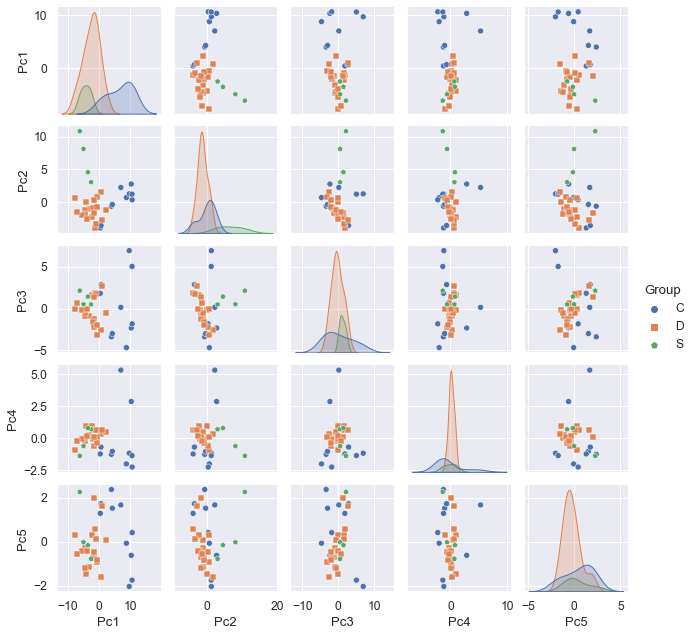

In [75]:
sns.pairplot(Pca_dataset, hue="Group", markers=["o", "s","p"],palette="deep",height=1.8,aspect=1)

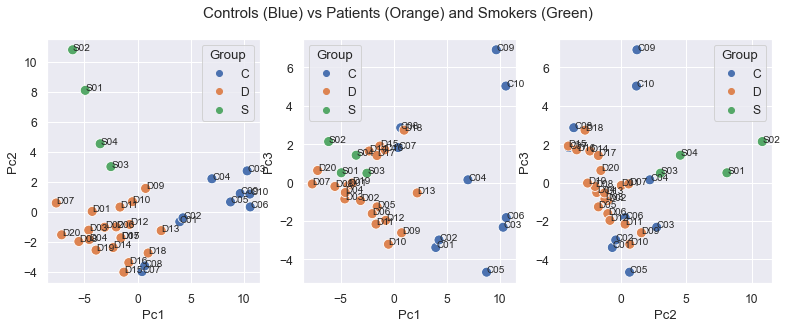

In [76]:
fig, axes = plt.subplots(1, 3,figsize=(13,4.5))

fig.suptitle("Controls (Blue) vs Patients (Orange) and Smokers (Green)", fontsize=15)

sns.scatterplot(ax=axes[0],x="Pc1",y="Pc2",hue="Group",data=Pca_dataset,s=100,alpha=1,marker="o",palette="deep")
sns.scatterplot(ax=axes[1],x="Pc1",y="Pc3",hue="Group",data=Pca_dataset,s=100,alpha=1,marker="o",palette="deep")
sns.scatterplot(ax=axes[2],x="Pc2",y="Pc3",hue="Group",data=Pca_dataset,s=100,alpha=1,marker="o",palette="deep")

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']),fontsize=10)

label_point(Pca_dataset.Pc1,Pca_dataset.Pc2, Pca_dataset['#'],axes[0])
label_point(Pca_dataset.Pc1,Pca_dataset.Pc3, Pca_dataset['#'],axes[1])
label_point(Pca_dataset.Pc2,Pca_dataset.Pc3, Pca_dataset['#'],axes[2])


In [77]:
Features_Final

,#,Group,S1_Mean,S1_max,S1_var,...,S8_max,S8_var,S8_med,S8_Kurt,S8_Skew
0,C01,C,0.599975,1.2825,0.132814,...,1.8575,0.271557,0.65950,-1.121665,0.582379
1,C02,C,0.596884,1.2085,0.118351,...,1.8420,0.258627,0.67975,-1.181699,0.528219
2,C03,C,0.881645,1.6010,0.178665,...,1.2665,0.083110,0.71900,-1.027847,0.282576
3,C04,C,0.821865,1.4240,0.125074,...,0.5300,0.012789,0.25400,-0.631798,0.662617
4,C05,C,0.814963,1.5345,0.223420,...,1.9815,0.360733,0.99200,-1.636951,0.198220
...,...,...,...,...,...,...,...,...,...,...,...
29,D20,D,0.241906,0.3565,0.002543,...,0.7510,0.024854,0.26675,0.316635,1.302957
30,S01,S,0.448155,0.7525,0.011508,...,1.1145,0.031986,0.46000,2.184793,1.854871
31,S02,S,0.428098,0.7370,0.008678,...,1.0980,0.027845,0.45050,3.265841,2.107734
32,S03,S,0.465433,0.6950,0.011075,...,1.1265,0.040072,0.50800,0.503189,1.340222


In [78]:
from sklearn.manifold import Isomap

In [79]:
embedding = Isomap(n_components=3,n_neighbors=4)
x = Features_Final.iloc[:,2:50 ]
x = StandardScaler().fit_transform(x)
X_transformed = embedding.fit_transform(x)

In [80]:
df_iso  = pd.DataFrame(X_transformed, columns=["eig1","eig2","eig3"])

In [81]:
df_iso=pd.concat([Features_Final.iloc[:,0:2],df_iso],axis=1)

## Application of non linear alternatives of PCA, e.g. ISOMAP

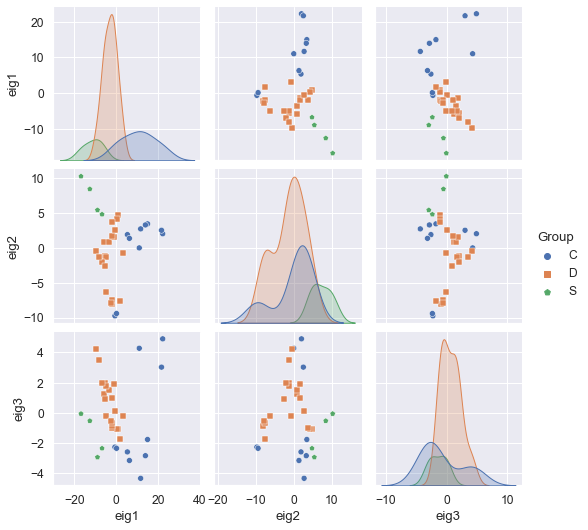

In [82]:
sns.pairplot(df_iso, hue="Group", markers=["o", "s","p"],palette="deep",height=2.5,aspect=1)